<a href="https://colab.research.google.com/github/Mask256/Mask256/blob/main/maize_leaf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ls

drive/  Maize_Leaf_Disease_Dataset.zip  sample_data/


In [ ]:
!unzip /content/Maize_Leaf_Disease_Dataset.zip -d /content/drive/MyDrive/dataset256

Archive:  /content/Maize_Leaf_Disease_Dataset.zip
replace /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1).jpeg  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1).jpg  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (10).jpg  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (100).jpg  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1000).JPG  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1001).JPG  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1002).JPG  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1003).JPG  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1004).JPG  
  inflating: /content/drive/MyDrive/dataset256/data/Blight/Corn_Blight (1005).JPG  
  

In [ ]:
image_path = tf.keras.utils.get_file('/content/drive/MyDrive/dataset256/data', 'https://www.kaggle.com/smaranjitghose/corn-or-maize-leaf-disease-dataset', untar=True)

In [ ]:
dataset_dir = pathlib.Path(image_path)

In [ ]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(image_count)

1658


In [ ]:
batch_size = 32
image_height = 180
image_width = 180

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


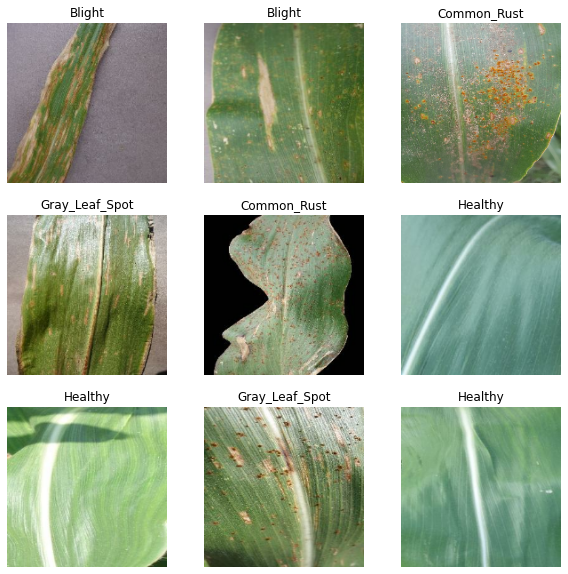

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    axis = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, label_batch in train_dataset:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = 4
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
                    layers.Conv2D(16, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs = 10
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/10
105/105 [==============================] - 114s 992ms/step - loss: 0.6765 - accuracy: 0.7198 - val_loss: 0.4792 - val_accuracy: 0.7551
Epoch 2/10
105/105 [==============================] - 102s 974ms/step - loss: 0.3947 - accuracy: 0.8326 - val_loss: 0.5001 - val_accuracy: 0.7730
Epoch 3/10
105/105 [==============================] - 103s 978ms/step - loss: 0.3139 - accuracy: 0.8744 - val_loss: 0.3255 - val_accuracy: 0.8530
Epoch 4/10
105/105 [==============================] - 102s 975ms/step - loss: 0.2760 - accuracy: 0.8821 - val_loss: 0.3433 - val_accuracy: 0.8542
Epoch 5/10
105/105 [==============================] - 102s 977ms/step - loss: 0.1980 - accuracy: 0.9251 - val_loss: 0.2910 - val_accuracy: 0.8781
Epoch 6/10
105/105 [==============================] - 102s 976ms/step - loss: 0.1652 - accuracy: 0.9418 - val_loss: 0.3919 - val_accuracy: 0.8483
Epoch 7/10
105/105 [==============================] - 102s 975ms/step - loss: 0.1474 - accuracy: 0.9472 - val_loss: 0.3288 -

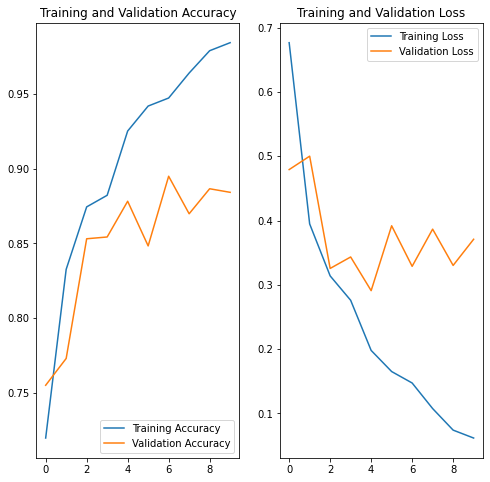

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)
])

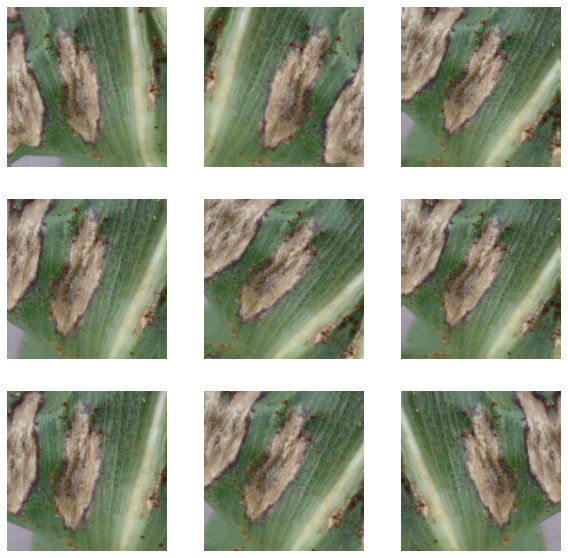

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/15
105/105 [==============================] - 119s 1s/step - loss: 0.6129 - accuracy: 0.7481 - val_loss: 0.4638 - val_accuracy: 0.7957
Epoch 2/15
105/105 [==============================] - 118s 1s/step - loss: 0.4517 - accuracy: 0.8090 - val_loss: 0.3882 - val_accuracy: 0.8315
Epoch 3/15
105/105 [==============================] - 118s 1s/step - loss: 0.3878 - accuracy: 0.8311 - val_loss: 0.3736 - val_accuracy: 0.8160
Epoch 4/15
105/105 [==============================] - 117s 1s/step - loss: 0.3602 - accuracy: 0.8406 - val_loss: 0.3346 - val_accuracy: 0.8315
Epoch 5/15
105/105 [==============================] - 117s 1s/step - loss: 0.3502 - accuracy: 0.8463 - val_loss: 0.3548 - val_accuracy: 0.8387
Epoch 6/15
105/105 [==============================] - 117s 1s/step - loss: 0.3209 - accuracy: 0.8588 - val_loss: 0.3313 - val_accuracy: 0.8483
Epoch 7/15
105/105 [==============================] - 117s 1s/step - loss: 0.3029 - accuracy: 0.8726 - val_loss: 0.3347 - val_accuracy: 0.8447

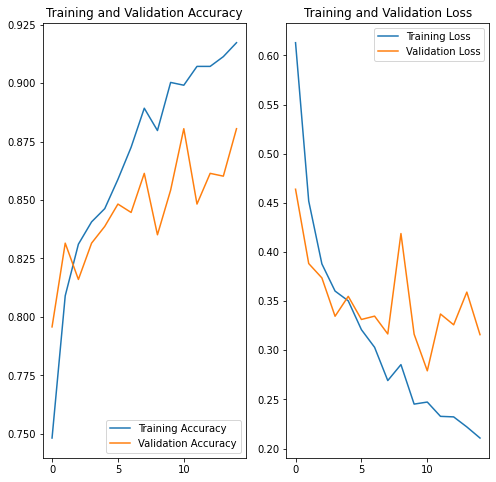

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()